# Исследование в интернет-магазине «Стримчик»

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Цели и задачи исследования:

Провести анализ произошедших изменений в сфере игр за имеющийся период данных. Определить факторы количественных и жанровых изменений по годам и регионам. Выявить перспективные напраления развития игровой индустрии для инвесторов и разработчиков.

## Гипотезы исследования

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Методика исследования:

- предобработка данных для анализа алгоритмами и инструментами работы с данными в формате csv
- статистические методы анализа данных

## Алгоритм исследований

1) Обзор данных
2) Предобработка данных
3) Добавление необходимых новых данных в таблицу
4) Исследовательский анализ
5) Обобщение работы, выводы

# Изучение входных данных

## Импорт библиотек и данных

In [1]:
# импорт необходимых библиотек в проекте
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
# откроем датафрейм (try - по ссылке, except - локально), посмотрим на содержимое
try:
    df = pd.read_csv('ССЫЛКА НА ДАТАФРЕЙМ')
    
except:
    df = pd.read_csv('data/games.csv')

df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Описание данных

- **Name** — название игры
- **Platform** — платформа
- **Year_of_Release** — год выпуска
- **Genre** — жанр игры
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
- **EU_sales** — продажи в Европе (миллионы проданных копий)
- **JP_sales** — продажи в Японии (миллионы проданных копий)
- **Other_sales** — продажи в других странах (миллионы проданных копий)
- **Critic_Score** — оценка критиков (максимум 100)
- **User_Score** — оценка пользователей (максимум 10)
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Общая информация о датафрейме

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div style='border:solid green 2px; padding: 20px'>
    
Запишем общее количество строк в переменную **len_data_in**, чтобы рассчитать процент уменьшения датасета на выходе **len_data_out**

In [4]:
len_data_in = len(df)
len_data_in

16715

Пропуски в столбцах:

In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Визуализация пропущенных данных по строкам датафрейма

<AxesSubplot:>

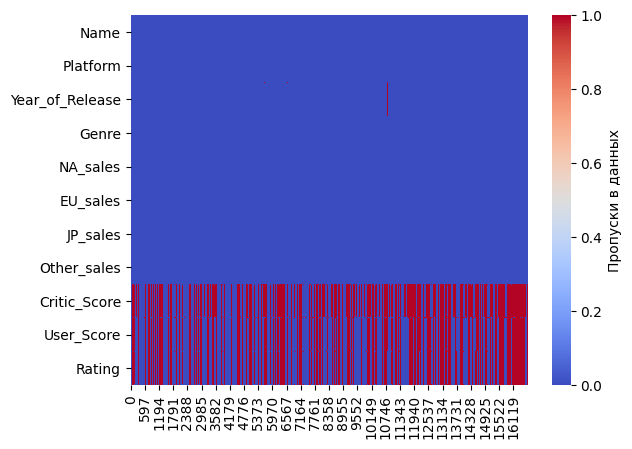

In [6]:
sns.heatmap(df.isna().transpose(), cmap="coolwarm", cbar_kws={'label': 'Пропуски в данных'})

Доля пропусков по столбцам:

In [7]:
pd.DataFrame(round(df.isna().mean()*100, 1)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,1.600000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.300000
User_Score,40.100000


Общая гистограмма для всех числовых столбцов датафрейма

<function matplotlib.pyplot.show(close=None, block=None)>

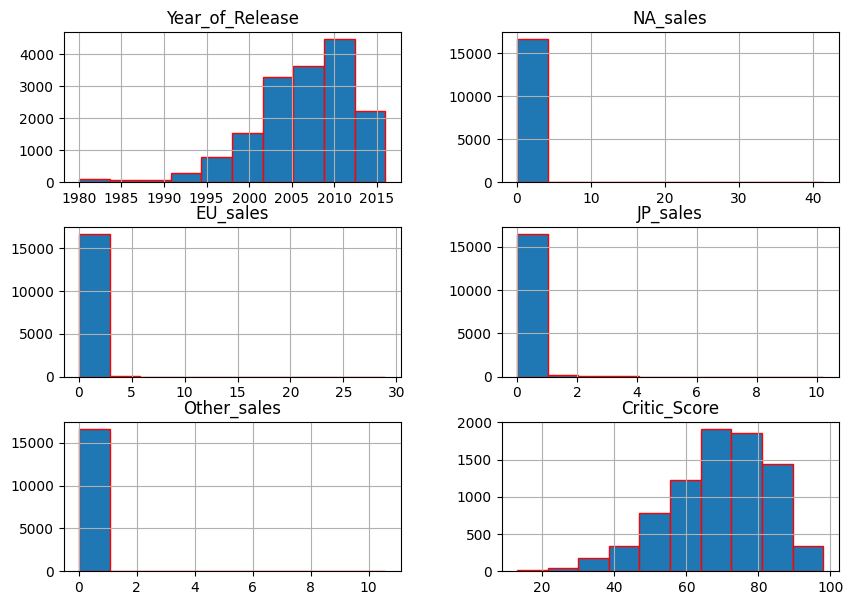

In [8]:
# откроем датафрейм, посмотрим на содержимое
df.hist(figsize=(10, 7), ec='red')
plt.show

По общей гистограмме:
- **Year_of_Release** — год выпуска. В столбце наблюдается рост количества выпущенных игр
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий). График неинформативен, нужен детальный анилиз данных в столбце
- **EU_sales** — продажи в Европе (миллионы проданных копий).  График неинформативен, нужен детальный анилиз данных в столбце
- **JP_sales** — продажи в Японии (миллионы проданных копий).  График неинформативен, нужен детальный анилиз данных в столбце
- **Other_sales** — продажи в других странах (миллионы проданных копий).  График неинформативен, нужен детальный анилиз данных в столбце
- **Critic_Score** — оценка критиков (максимум 100). Оценки имеют Нормальный характери распределения

Основные статистические данные датафрейма

In [9]:
np.round(df.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.48,5.88,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.26,0.81,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.15,0.50,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.08,0.31,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.05,0.19,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.97,13.94,13.0,60.0,71.00,79.00,98.00


Проверим наличие полных (явных) дубликатов в исходных данных:

In [10]:
df.duplicated().sum()

0

<div style='border:solid blue 3px; padding: 20px'>

**Выводы п.2:**
- в датафрейме всего 10 колонок
- количество строк в таблице: 16 715
- количество строк в столбцах отличается,
- есть разные виды значений (float64 - вещественные числа с плавающей запятой, object - строковые)
- названия столбцов с разным регистром, требуется переименование
- из шести графиков четыре требуется детально рассмотреть. По количеству пропусков (от 40 до 51%) в столбцах **Critic_Score, User_Score** и **Rating** требуется оценить возможность заполнения пропусков для минимизации потерь данных.
- статистические данные этого датафрейма отражают значительный разброс значений в столбцах **NA_sales, EU_sales, JP_sales, Other_sales**
- не получены статистические данные в колонках **User_Score** и **Rating** из-за большого количества пропусков
- в датафрейме отсутствуют полные дубликаты

# Подготовка данных

## Переименование названий столбцов

Переименуем названия столбцов в стиле PEP8

In [11]:
df = df.rename(columns={'Name': 'name', 
                            'Platform': 'platform', 
                            'Year_of_Release': 'year_of_release',
                            'Genre': 'genre', 
                            'NA_sales': 'na_sales',
                            'EU_sales': 'eu_sales',
                            'JP_sales': 'jp_sales',
                            'Other_sales': 'other_sales',
                            'Critic_Score': 'critic_score',
                            'User_Score': 'user_score',
                            'Rating': 'rating'
                           })

print('Названия колонок после переименования:', df.columns)

Названия колонок после переименования: Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


## Изменение типов данных

В столбцах перечисленных ниже необходимо изменить тип данных на целые числа (integer) не трогая пропуски:
- **year_of_release** - год не может быть типа float
- **critic_score** - в значениях этого столбца нет десятичных

In [12]:
# преобразуем столбцы 'year_of_release' и 'critic_score' 
# в целочисленный тип данных, убирая возможные ошибки при конвертации

df['year_of_release'] = np.floor(pd.to_numeric(df['year_of_release'], errors='coerce')).astype('Int64')
df['critic_score'] = np.floor(pd.to_numeric(df['critic_score'], errors='coerce')).astype('Int64')

In [13]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

## Уникальные значения в колонках

Посмотрим на уникальные значения в колонках:
- **name**
- **platform**
- **genre**

In [14]:
print('Количество уникальных значений в колонке name:', len(df['name'].unique()))
print('Количество уникальных значений в колонке platform:', len(df['platform'].unique()))
print('Количество уникальных значений в колонке genre:', len(df['genre'].unique()))

Количество уникальных значений в колонке name: 11560
Количество уникальных значений в колонке platform: 31
Количество уникальных значений в колонке genre: 13


Приведем значения в колонках к нижнему регистру, посмотрим как изменится количество уникальных значений

In [15]:
df['name'] = df['name'].str.lower()
df['platform'] = df['platform'].str.lower()
df['genre'] = df['genre'].str.lower()

print('Количество уникальных значений после приведения к нижнему регистру в колонках:')
print('name:', len(df['name'].unique()))
print('platform:', len(df['platform'].unique()))
print('genre:', len(df['genre'].unique()))

Количество уникальных значений после приведения к нижнему регистру в колонках:
name: 11560
platform: 31
genre: 13


<div style='border:solid green 2px; padding: 20px'>
Количество уникальных значений не изменилось, но значения оставим в нижнем регистре

## Замена пропусков

В датафрейме всего 4 столбца с пропусками

### Столбец year_of_release

В столбце **year_of_release** суммарно 1,6% пропусков. Попробуем заполнить пропущенные значения значением первого года выпуска игры с тем же названием 

In [16]:
# Заполним пропущенные значения в столбце 'year_of_release' значением первого года выпуска игры с тем же названием 
df = df.fillna({'year_of_release': df.groupby('name')['year_of_release'].transform('first')})

# Проверим результат
df.isna().sum()

name                  2
platform              0
year_of_release     146
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<div style='border:solid green 2px; padding: 20px'>

В столбце **year_of_release** осталось 146 пропусков (почти половину получилось заменить), удалим их, т.к. это 0.9% от общего количества строк 

In [17]:
# удаляем строки с пропусками
df = df.dropna(subset=['year_of_release'])

<div style='border:solid blue 3px; padding: 20px'>

**Выводы п.3.4.1:**
- общее количество пропусков в столбце было 269, часть данных заменили значением первого года выпуска игры с тем же названием 
- после замены пустых строк - 146, что составило 0.9% от общего количества строк, эти строки удалили
- возможные причины пропусков: так как пропусков мало, возможно, из-за невнимательности/нежелания заполнения

### Столбец critic_score

В данном столбце 8578 (всего строк 16 715), что составляет 51.3% всего объема датафрейма (см. п.2.3). Удалять такие пропуски нельзя.
Так как в данном столбце все значения положительные, тогда заменим пропуски на "заглушку" в виде отрицательного значения (например, -1) так мы будем легко отделять пропуски от нужных данных

In [18]:
# заменяем пропуски на -1
df['critic_score'] = df['critic_score'].fillna(-1)

# проверяем результат
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16569 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16569 non-null  object 
 2   year_of_release  16569 non-null  Int64  
 3   genre            16567 non-null  object 
 4   na_sales         16569 non-null  float64
 5   eu_sales         16569 non-null  float64
 6   jp_sales         16569 non-null  float64
 7   other_sales      16569 non-null  float64
 8   critic_score     16569 non-null  Int64  
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.5+ MB


<div style='border:solid blue 3px; padding: 20px'>

**Выводы п.3.4.2:**
- пропусков в столбце очень много (51.3%), заменили их на -1
- при дальнейшем анализе данных столбца **critic_score** необходимо исключить ячейки со значением -1
- Возможные причины пропусков:
 1) ввиду большого количества пропусков, вероятно, что критики - профессиональные игроки не рассматривали данную игру из-за низкой популярности
 2) критерии оценки у критиков появились после даты выпуска игры, соотетственно оценка устарешвей игры стала неактуальна

### Столбец user_score

В данном столбце 6701 (всего строк 16 715), что составляет 40.1% всего объема датафрейма (см. п.2.3). Удалять такие пропуски нельзя. Так как в данном столбце все значения положительные, тогда заменим пропуски на "заглушку" в виде отрицательного значения (например, -1) так мы будем легко отделять пропуски от нужных данных

In [19]:
# заменяем пропуски на -1
df['user_score'] = df['user_score'].fillna(-1)

# проверяем результат
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16569 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16569 non-null  object 
 2   year_of_release  16569 non-null  Int64  
 3   genre            16567 non-null  object 
 4   na_sales         16569 non-null  float64
 5   eu_sales         16569 non-null  float64
 6   jp_sales         16569 non-null  float64
 7   other_sales      16569 non-null  float64
 8   critic_score     16569 non-null  Int64  
 9   user_score       16569 non-null  object 
 10  rating           9868 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.5+ MB


В столбце **user_score** есть данные типа **object**. Посмотрим что это. Выведем уникальные значения для этого столбца

In [20]:
# Выведем уникальные значения для столбца user_score
user_score_unique = df['user_score'].unique()
user_score_unique

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

<div style='border:solid green 2px; padding: 20px'>
    
Данные типа **object** принадлежат значению **'tbd'**. Интернет-поиск в теме игр дал расшифровку абревиатуры - это сокращение от **'to be defined'**, т.е. - 'подлежащий определению', значит скоро для этих игр будет оценивание, а пока заменим эти данные на заглушку в виде '-10'. Предварительно посмотрим на количество таких значений:

In [21]:
df.user_score.value_counts()

-1     6635
tbd    2394
7.8     324
8       288
8.2     279
       ... 
9.6       2
0.2       2
0.3       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

In [22]:
# заменим tbd на -10
df.loc[df['user_score'] == 'tbd', 'user_score'] = '-10'

# преобразуем значения в столбце в тип данных - float
df['user_score'] = df['user_score'].astype('float')

# проверим результат
df.user_score.value_counts()

-1.0     6635
-10.0    2394
 7.8      324
 8.0      288
 8.2      279
         ... 
 0.7        2
 0.2        2
 1.0        2
 9.7        1
 0.0        1
Name: user_score, Length: 97, dtype: int64

<div style='border:solid blue 3px; padding: 20px'>

**Выводы п.3.4.3:**
- пропусков в столбце очень много (40.1%), заменили их на -1
- при дальнейшем анализе данных столбца **user_score** необходимо исключить ячейки со значением -1
- Возможные причины пропусков:
 1) ввиду большого количества пропусков, вероятно, что обычные пользователи не рассматривали данную игру из-за ее низкой популярности
 2) обычные пользователи чаще всего ставят оценки, когда испытывают большие эмоции от игры, как положительные, так и отрицательные. Для обычных игр вероятно, что пользователи предпочли вовсе не ставить оценку
 3) ожидания выхода игры могли не оправдать пользователя, в результате чего этим играм пользователи ни оценку не поставили, ни играли в них вовсе
- в столбце были значения **tbd**, которые заменили на "заглушку" со значением -10

### Столбец rating

В данном столбце 6766 (всего строк 16 715), что составляет 40.5% всего объема датафрейма (см. п.2.3). Удалять такие пропуски нельзя. Так как в данном столбце все значения положительные, тогда заменим пропуски на "заглушку" в виде отрицательного значения (например, -1) так мы будем легко отделять пропуски от нужных данных

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16569 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16569 non-null  object 
 2   year_of_release  16569 non-null  Int64  
 3   genre            16567 non-null  object 
 4   na_sales         16569 non-null  float64
 5   eu_sales         16569 non-null  float64
 6   jp_sales         16569 non-null  float64
 7   other_sales      16569 non-null  float64
 8   critic_score     16569 non-null  Int64  
 9   user_score       16569 non-null  float64
 10  rating           9868 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.5+ MB


In [24]:
# заменяем пропуски на -1
df['rating'] = df['rating'].fillna('unknown')

# проверяем результат
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16569 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16569 non-null  object 
 2   year_of_release  16569 non-null  Int64  
 3   genre            16567 non-null  object 
 4   na_sales         16569 non-null  float64
 5   eu_sales         16569 non-null  float64
 6   jp_sales         16569 non-null  float64
 7   other_sales      16569 non-null  float64
 8   critic_score     16569 non-null  Int64  
 9   user_score       16569 non-null  float64
 10  rating           16569 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.5+ MB


In [25]:
df.rating.value_counts()

unknown    6701
E          3958
T          2930
M          1554
E10+       1412
EC            8
K-A           3
RP            2
AO            1
Name: rating, dtype: int64

<div style='border:solid blue 3px; padding: 20px'>

**Выводы п.3.4.4:**
- пропусков в столбце очень много (40.5%), заменили их на **'unknown'**
- при дальнейшем анализе данных столбца **rating** необходимо исключить ячейки со значением **'unknown'**
- Возможные причины пропусков:
    1) рейтинговые организации **ESRB** имеют жесткие критерии отбора игр для оценки, в которые далеко не все игры попадают
    2) критерии оценки у рейтинговых организаций появились после даты выпуска игры, соотетственно оценка устарешвей игры стала неактуальна

## Новый столбец - суммарные продажи во всех регионах 'sum_sale'

Добавим в датафрейм новый столбец с суммарными продажами во всех регионах **'sum_sale'**

In [26]:
 # Посчитаем суммарные продажи по регионам
df['sum_sale'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

# проверим результат
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sale
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


<div style='border:solid blue 3px; padding: 20px'>

**Выводы п.3.5:**
- добавлен новый столбец - суммарные продажи во всех регионах 'sum_sale', который будет использован в дальнейшем анализе

# Исследовательский анализ

## Количество выпущенных игр по годам

In [27]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'sum_sale'],
      dtype='object')

Посмотрим статистические данные по колонке **year_of_release**:

In [28]:
df['year_of_release'].describe().apply("{0:.0f}".format)

count    16569
mean      2006
std          6
min       1980
25%       2003
50%       2007
75%       2010
max       2016
Name: year_of_release, dtype: object

Построим диаграмму размаха в полном диапазоне

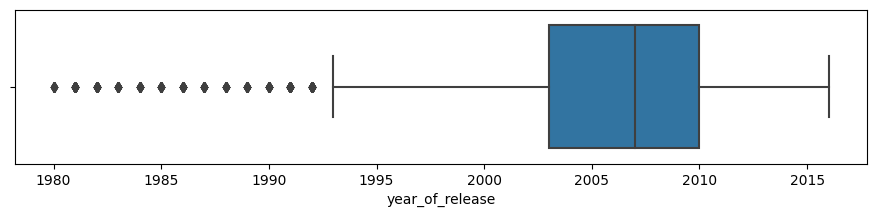

In [29]:
plt.figure(figsize=(11, 2))
sns.boxplot(x=df['year_of_release'])
plt.show()

Распределение количества релизов в диапазоне с 1980г по 2016г на диаграмме ниже:

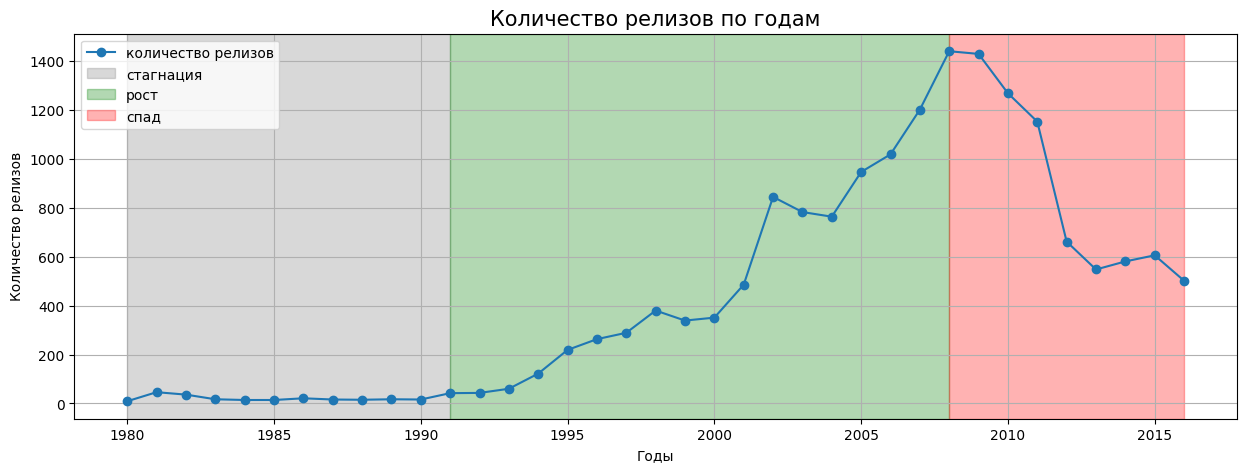

In [30]:
# df['year_of_release'].sort_values().plot(
#     y = 'year_of_release', kind = 'hist', bins = 37, range=(1980, 2016), figsize=(10, 4), ec='red', legend=False)
# plt.title('Распределение релизов по годам')
# plt.xlabel('Годы')
# plt.ylabel('Количество релизов')
# plt.show()


plt.figure(figsize=(15, 5))
plt.title('Количество релизов по годам', fontsize=15)
plt.ylabel('Количество релизов')
plt.xlabel('Годы')
plt.plot(df.groupby('year_of_release')['name'].count(), 'o-', label='количество релизов', alpha=1)
plt.axvspan(1980, 1991, color='grey', label='стагнация', alpha=0.3)
plt.axvspan(1991, 2008, color='green', label='рост', alpha=0.3)
plt.axvspan(2008, 2016, color='red', label='спад', alpha=0.3)
plt.grid(True)
plt.legend();

<div style='border:solid blue 3px; padding: 20px'>

**Выводы п.4.1:**
- рост количества релизов наблюдается с 1992 года по 2008г
- резкий спад релизов с 2009г вероятно, что произошол на фоне мирового экономического кризиса (2008-2013гг). В такие периоды спрос на игры сильно подает, т.к. люди в первую очередь закрывают базовые потребности
- данные за 2016 год неинформативны, вероятно, что за этот год еще не получены в полном объеме

## Изменение продаж в игровых платформах

Посмотрим на количество продаж в штуках по каждой платформе

In [31]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'sum_sale'],
      dtype='object')

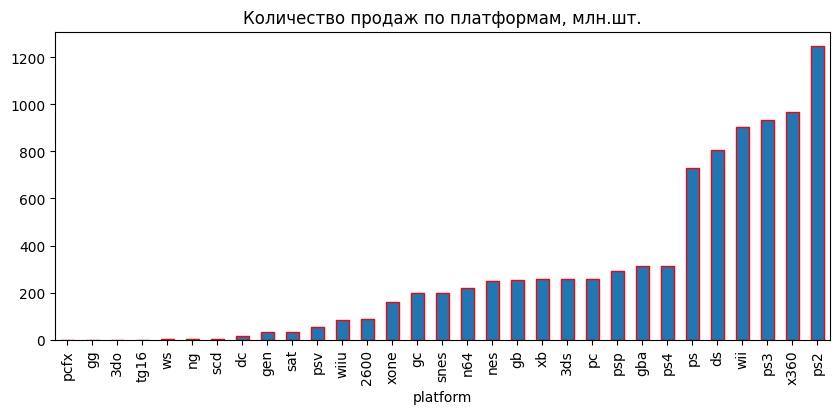

In [32]:
(df.groupby('platform')['sum_sale'].sum()
 .sort_values().plot.bar(figsize=(10,4), ec='red', legend=False))

plt.title('Количество продаж по платформам, млн.шт.')

plt.show()

Выделяется 6 лидеров - **ps2, x360, ps3, wii, ds, ps**, остальные заметно уступают в продажах. Посмотрим на продажи по годам ТОП-6 платформ.

Для дальнейшего анализа ТОП-6 создадим переменную для количества продаж по платформам

In [33]:
# переменная с количеством продаж по платформам
platform_sales = (df.pivot_table(index='platform', values='sum_sale', aggfunc='sum')
    .sort_values('sum_sale', ascending=False))

Пройдемся циклом по ТОП-6 продажам, т.к. построение графиков однотипное

ps2


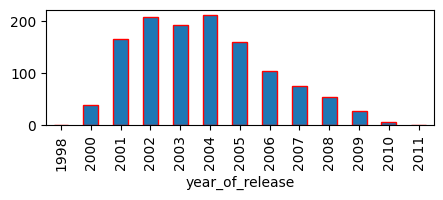

x360


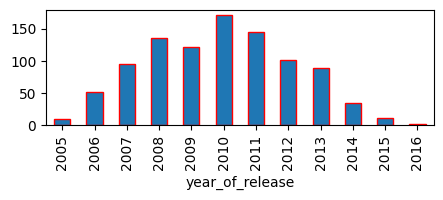

ps3


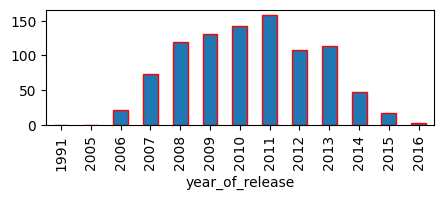

wii


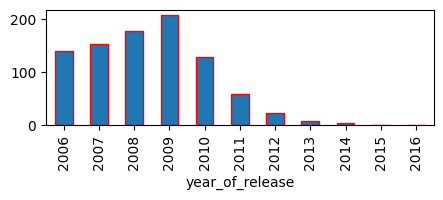

ds


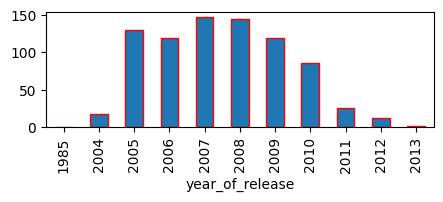

ps


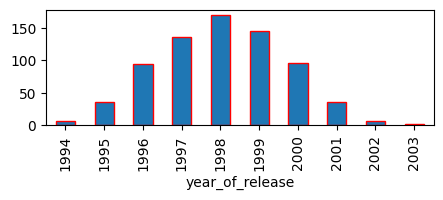

In [34]:
# цикл для построения графиков первых 6 элементов переменной platform_sales
for platform in platform_sales.index[:6]:
    print(platform)
    (df.query('platform == @platform')
     .pivot_table(index='year_of_release', values='sum_sale', aggfunc='sum')
     .plot(kind='bar', figsize=(5,1.5), ec='red', legend=False)
    )
    plt.show()

<div style='border:solid blue 3px; padding: 20px'>

**Выводы п.4.2:**
- по количеству продаж по платформам выделяется 6 лидеров - ps2, x360, ps3, wii, ds, ps, остальные заметно уступают
- анализируя продажи каждой платформы по отдельности по годам можно сделать вывод, что у каждой платформы был определенный успех в разные годы:
    1) **ps2** основные продажи были совершены в период с 2002г по 2005г
    2) **x360** - пик в 2010 году, хотя в целом продажи были хорошими длительный период с 2007г по 2013г
    3) **ps3** - после смены ps2 на ps3, пошел следующий пик продаж в период с 2008г по 2011г
    4) у платформы **wii** с 2006г по 2009г рост, а потом резкий спад
    5) у платформы **ds** стабильные продажи сохранялись в период с 2005г по 2010г
    6) платформа **ps** была предшественником **ps2** и **ps3**. Пик **ps** пришелся на 1998г, хотя хорошие продажи были в период с 1996г по 2000г
- по графикам серии платформ **ps** видно, как раступ продажи первой, достигают пика, затухают, в этот период появляется следующая - вторая **ps**, и так до **ps3**

## Прогноз продаж на основе актуального периода

Игровая индустрия развивается достаточно быстро, поэтому актуальный период будем считать последние три года в имеющихся данных

In [35]:
 # сформируем таблицу за период после 2014 года
actual_sales = df.query('year_of_release >= 2014')

# проверяем
actual_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sale
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,-1,-1.0,unknown,11.68
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,-1,-1.0,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01


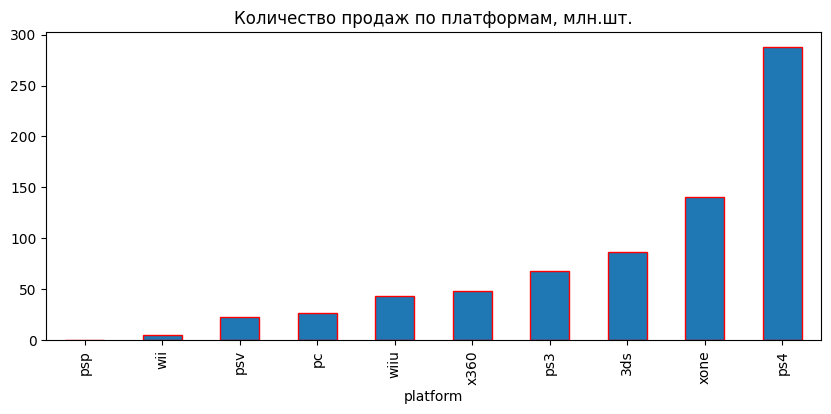

In [36]:
(actual_sales.groupby('platform')['sum_sale'].sum()
 .sort_values().plot.bar(figsize=(10,4), ec='red', legend=False))

plt.title('Количество продаж по платформам, млн.шт.')
plt.show()

<div style='border:solid blue 3px; padding: 20px'>

**Выводы п.4.3:**
- по графику явно наблюдается смена поколений на платформе **ps**. Теперь в лидерах **ps4**
- составляя прогноз на 2017 год можно однозначно выделить лидера - платформу **ps4**, однако, платформа **xone** имеет все шансы догнать и преуспеть. Никто не исключает роль "черных лебедей" как положительных, так и отрицательных в развитии этих двух лидирующих платформ

## График «ящик с усами» по глобальным продажам игр в разбивке по платформам

Статистический анализ продаж по платформам за период с 2014г по 2016г позволяет выявить некоторые неочевидные закономерности. Рассмотрим их на графике ниже.

In [37]:
 # составление таблицы из потенциально прибыльных платформ
games_top = actual_sales.query('platform not in ["3DS", "PS3", "X360", "PC", "PSV", "Wii", "PSP"]')

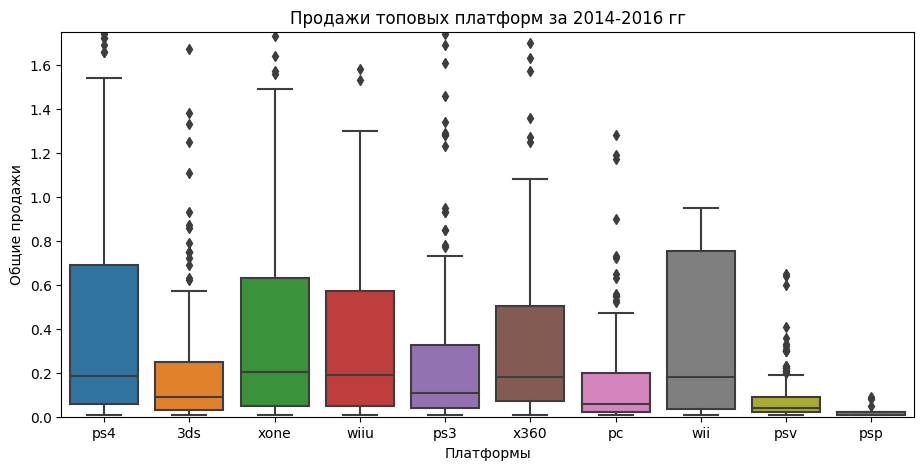

In [38]:
 plt.figure(figsize=(11, 5))
(sns.boxplot(data = games_top, y = 'sum_sale', x='platform')
    .set(title = 'Продажи топовых платформ за 2014-2016 гг', 
         xlabel = 'Платформы', 
         ylabel = 'Общие продажи',
         ylim=(0, 1.75)))
plt.show()

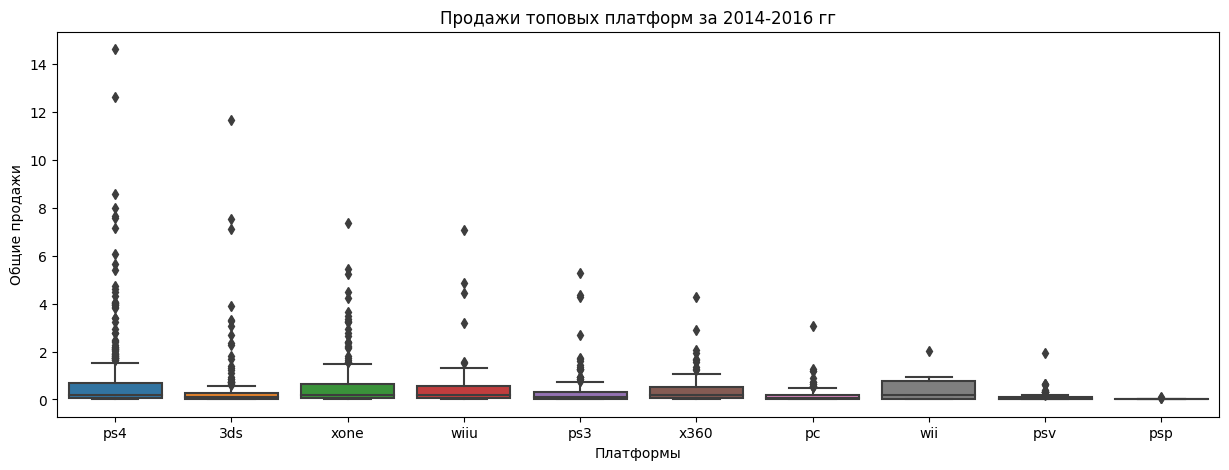

In [39]:
plt.figure(figsize=(15, 5))
    
sns.boxplot(data = games_top, y = 'sum_sale', x='platform').set(title = 'Продажи топовых платформ за 2014-2016 гг', 
         xlabel = 'Платформы', 
         ylabel = 'Общие продажи')
         

plt.show()

<div style='border:solid blue 3px; padding: 20px'>

**Выводы п.4.4:**
- в первую очередь следует обратить внимание на медианные продажи по каждой платформе. Пять платформы (**ps4, xone, wiiu, x360, wii**) имеют примерно одинаковые значения по этому показателю
- длинна ящика свидетельствует о стабильности продаж по годам - чем он длиннее, тем стабильнее бизнес. Пять стабильных продаж в тех же платформах (**ps4, xone, wiiu, x360, wii**)

## Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы

In [40]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'sum_sale'],
      dtype='object')

In [41]:
game_top_ps4 = games_top[(games_top['platform'] == 'ps4') & (games_top['user_score'] != -1)  & (games_top['user_score'] != -10)] 

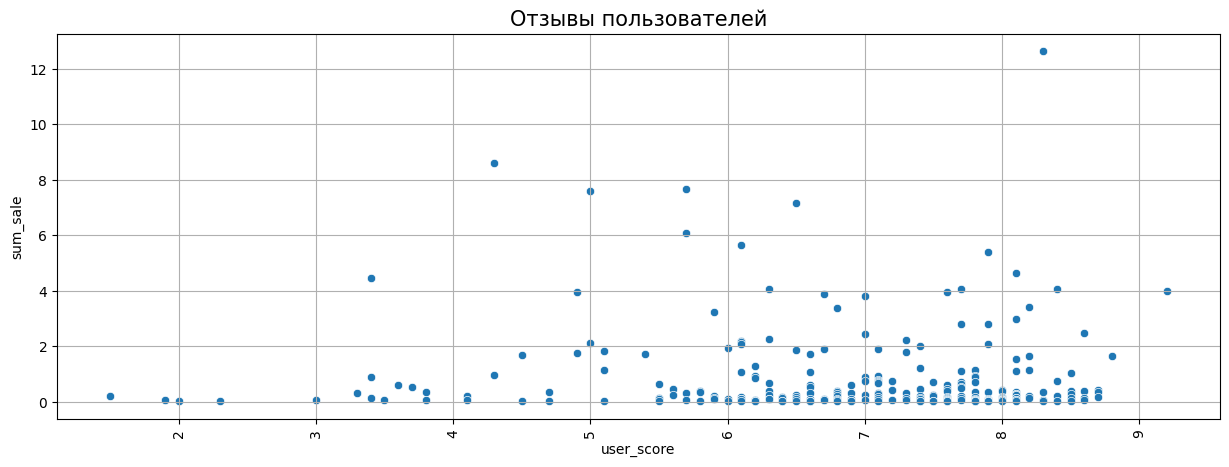

In [42]:
plt.figure(figsize=(15, 5))
plt.title('Отзывы пользователей', fontsize=15)
sns.scatterplot(x='user_score', y='sum_sale', data=game_top_ps4)
plt.ylabel('sum_sale')
plt.xlabel('user_score')
plt.xticks(rotation=90)
plt.grid(True)

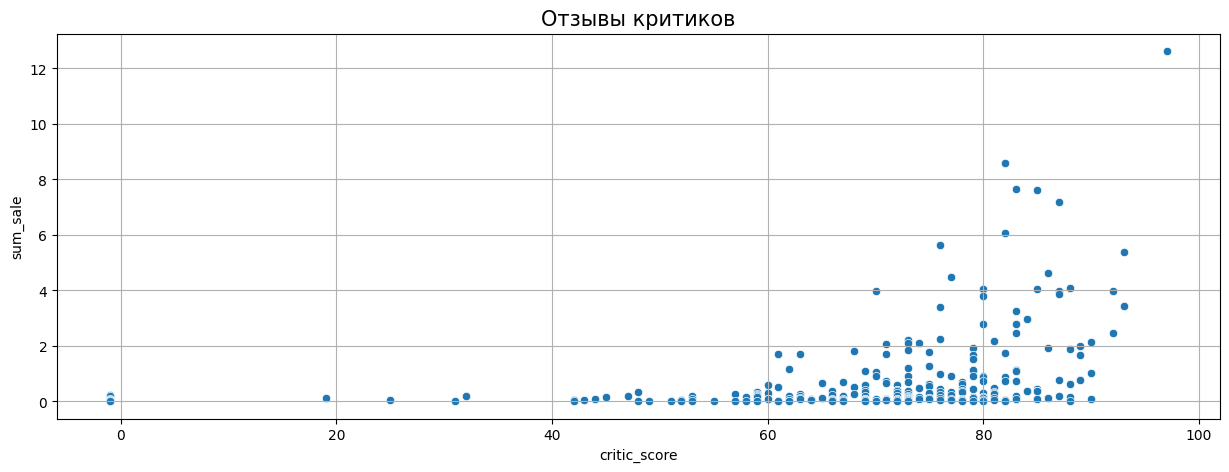

In [43]:
plt.figure(figsize=(15, 5))
plt.title('Отзывы критиков', fontsize=15)
sns.scatterplot(x='critic_score', y='sum_sale', data=game_top_ps4)
plt.ylabel('sum_sale')
plt.xlabel('critic_score')
plt.grid(True);

<div style='border:solid blue 3px; padding: 20px'>

**Выводы п.4.5:**
- рейтинг отзывов пользователей и критиков напрямую влияет на количество продаж - чем выше оценки, тем больше продаж
- бОльшее влияние на продажу оказывают высокие оценки критиков, очевидно, что покупатели больше ориентируются на оценки профессионалов, нежели обычных пользователей

## Корреляция между отзывами и продажами

In [44]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'sum_sale'],
      dtype='object')

In [45]:
# Общая матрица корреляции по всему датафрейму
corr_matrix_1 = df.corr().round(2)

display(corr_matrix_1)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sale
year_of_release,1.00,-0.09,0.00,-0.17,0.04,0.11,0.07,-0.08
na_sales,-0.09,1.00,0.77,0.45,0.64,0.15,0.13,0.94
eu_sales,0.00,0.77,1.00,0.44,0.72,0.17,0.15,0.90
jp_sales,-0.17,0.45,0.44,1.00,0.29,-0.04,0.03,0.61
other_sales,0.04,0.64,0.72,0.29,1.00,0.18,0.15,0.75
critic_score,0.11,0.15,0.17,-0.04,0.18,1.00,0.60,0.15
user_score,0.07,0.13,0.15,0.03,0.15,0.60,1.00,0.14
sum_sale,-0.08,0.94,0.90,0.61,0.75,0.15,0.14,1.00


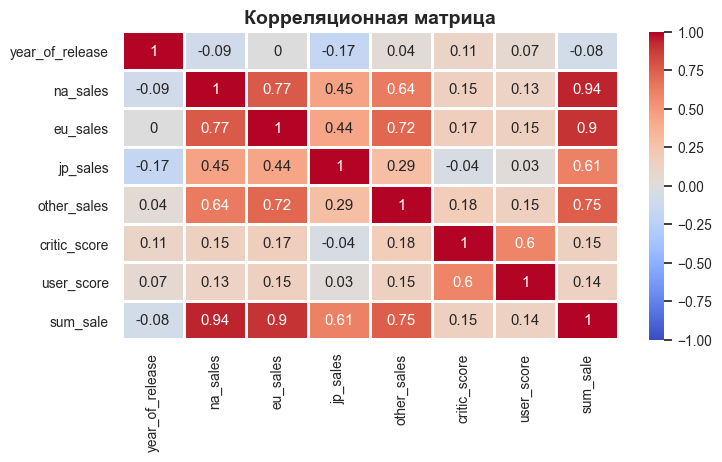

In [46]:
# Вывод матрицы корреляции в графическом виде
plt.figure(figsize = (8, 4))
sns.set(font_scale=0.9)

sns.heatmap(corr_matrix_1, annot=True,
            linewidths=1.5, cmap='coolwarm',
            vmin=-1, vmax=1)

plt.title('Корреляционная матрица', fontweight='bold', fontsize=14)
plt.show()

<div style='border:solid blue 3px; padding: 20px'>

**Выводы п.4.6:**
- по общей матрице корреляции видно, что оценки пользователей (0,14) и оценки критиков (0,15) мало коррелируют с общими продажами

## Распределение игр по жанрам

Рассмотрим как распределяются продажи игр по жанрам

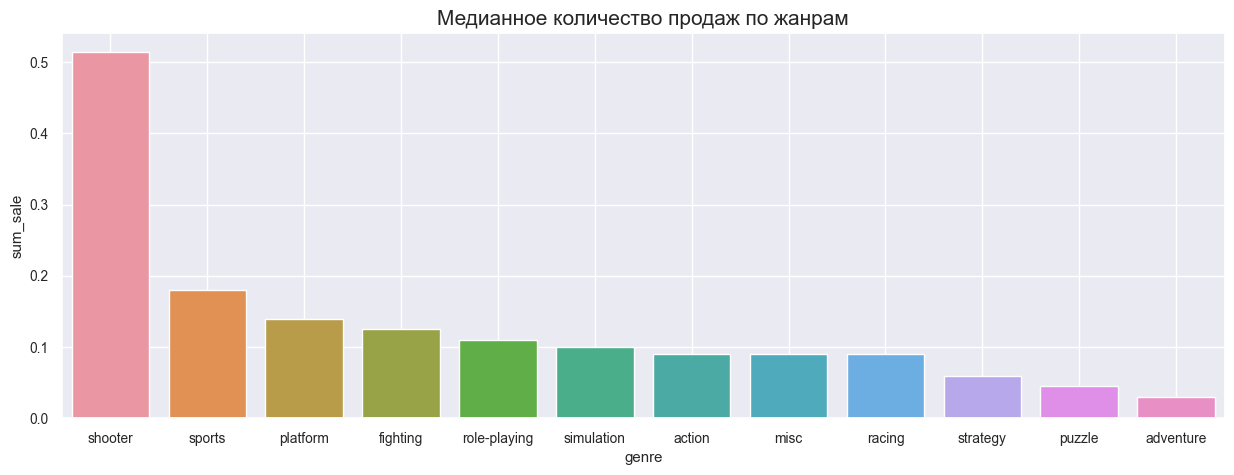

In [47]:
genre_sum_sale = games_top.pivot_table(
    index='genre', values='sum_sale', aggfunc='median').sort_values(
    by='sum_sale', ascending=False).reset_index()

plt.figure(figsize=(15, 5))
plt.title('Медианное количество продаж по жанрам', fontsize=15)
sns.barplot(x='genre', y='sum_sale', data=genre_sum_sale)
plt.grid(True);

<div style='border:solid blue 3px; padding: 20px'>

**Выводы п.4.7:**
- наиболее продаваемый жанр - шутеры
- продажи шутеров более чем в два раз выше, чем второй по популярности жанр - спорт
- остальные жанры имеют примерно одинаковое количество продаж
- меньше всего интерес пользователи проявляют к приключениям

<div style='border:solid blue 3px; padding: 20px'>

**Общий вывод п.4:**
- рост количества релизов наблюдается с 1992 года по 2008г
- резкий спад релизов с 2009г вероятно, что произошол на фоне мирового экономического кризиса (2008-2013гг). В такие периоды спрос на игры сильно подает, т.к. люди в первую очередь закрывают базовые потребности
- данные за 2016 год неинформативны, вероятно, что за этот год еще не получены в полном объеме
- по количеству продаж по платформам выделяется 6 лидеров - ps2, x360, ps3, wii, ds, ps, остальные заметно уступают
- анализируя продажи каждой платформы по отдельности по годам можно сделать вывод, что у каждой платформы был определенный успех в разные годы:
    1) **ps2** основные продажи были совершены в период с 2002г по 2005г
    2) **x360** - пик в 2010 году, хотя в целом продажи были хорошими длительный период с 2007г по 2013г
    3) **ps3** - после смены ps2 на ps3, пошел следующий пик продаж в период с 2008г по 2011г
    4) у платформы **wii** с 2006г по 2009г рост, а потом резкий спад
    5) у платформы **ds** стабильные продажи сохранялись в период с 2005г по 2010г
    6) платформа **ps** была предшественником **ps2** и **ps3**. Пик **ps** пришелся на 1998г, хотя хорошие продажи были в период с 1996г по 2000г
- по графикам серии платформ **ps** видно, как раступ продажи первой, достигают пика, затухают, в этот период появляется следующая - вторая **ps**, и так до **ps3**
- по графику явно наблюдается смена поколений на платформе **ps**. Теперь в лидерах **ps4**
- составляя прогноз на 2017 год можно однозначно выделить лидера - платформу **ps4**, однако, платформа **xone** имеет все шансы догнать и преуспеть. Никто не исключает роль "черных лебедей" как положительных, так и отрицательных в развитии этих двух лидирующих платформ
- в первую очередь следует обратить внимание на медианные продажи по каждой платформе. Пять платформы (**ps4, xone, wiiu, x360, wii**) имеют примерно одинаковые значения по этому показателю
- длинна ящика свидетельствует о стабильности продаж по годам - чем он длиннее, тем стабильнее бизнес. Пять стабильных продаж в тех же платформах (**ps4, xone, wiiu, x360, wii**)
- рейтинг отзывов пользователей и критиков напрямую влияет на количество продаж - чем выше оценки, тем больше продаж
- бОльшее влияние на продажу оказывают высокие оценки критиков, очевидно, что покупатели больше ориентируются на оценки профессионалов, нежели обычных пользователей
- по общей матрице корреляции видно, что оценки пользователей (0,14) и оценки критиков (0,15) мало коррелируют с общими продажами
- наиболее продаваемый жанр - шутеры
- продажи шутеров более чем в два раз выше, чем второй по популярности жанр - спорт
- остальные жанры имеют примерно одинаковое количество продаж
- меньше всего интерес пользователи проявляют к приключениям

# Портрет пользователя каждого региона

In [48]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'sum_sale'],
      dtype='object')

In [49]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sale
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


## ТОП-5 популярных платформ

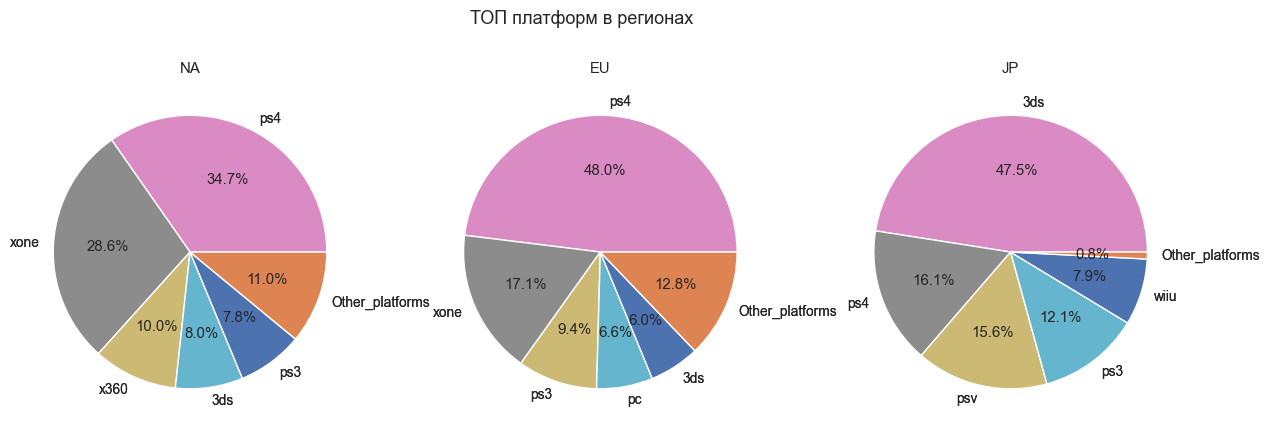

In [50]:
 # список регионов
countries = actual_sales.columns[4:7]

# круговая диаграмма для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП платформ в регионах')
for i in range(3):
  # 5 самых продающих платформ
  df_i = (actual_sales.groupby('platform')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в Other_platforms
  df_i = df_i.append({'platform': 'Other_platforms', countries[i]: actual_sales[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['platform'])
  axs[i].pie(df_i[countries[i]], labels = df_i['platform'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

<div style='border:solid blue 3px; padding: 20px'>

**Выводы п.5.1:**
- во всех регионах самая популярная платформа - **ps4**
- на втором месте по популярности во всех регионах **xone**

## ТОП-5 популярных жанров

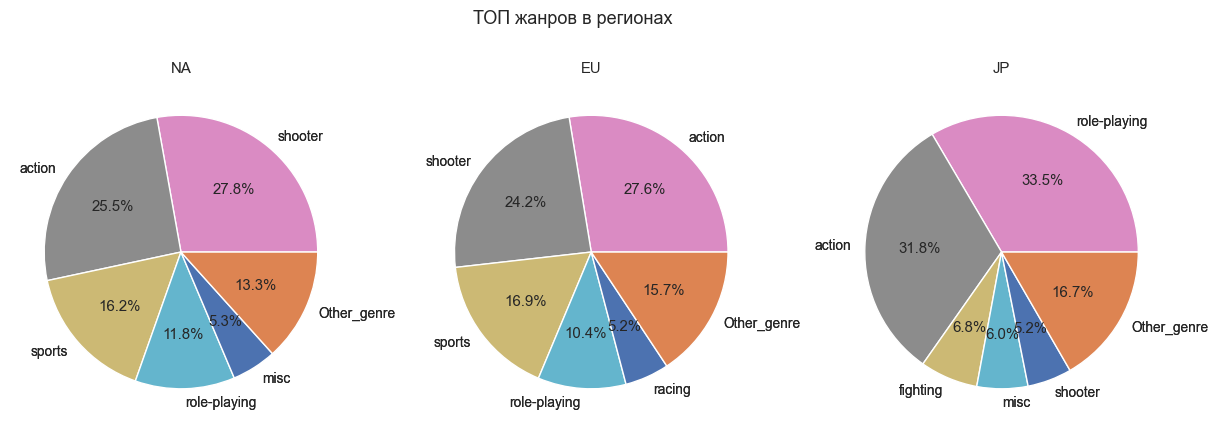

In [51]:
 # круговая диаграмма для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП жанров в регионах')
for i in range(3):
  # 5 самых продающих жанров
  df_i = (actual_sales.groupby('genre')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в Other_genre
  df_i = df_i.append({'genre': 'Other_genre', countries[i]: actual_sales[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['genre'])
  axs[i].pie(df_i[countries[i]], labels = df_i['genre'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

<div style='border:solid blue 3px; padding: 20px'>

**Выводы п.5.2:**
- популярность жанров в регионах отличается
1) в Северной Америке и Европе самые популярные жанры: шутеры, аркады и спортивные
2) в Японии вкусы отличаются: ролевые игры и аркады 

## Влияние рейтинга ESRB на продажи в регионах

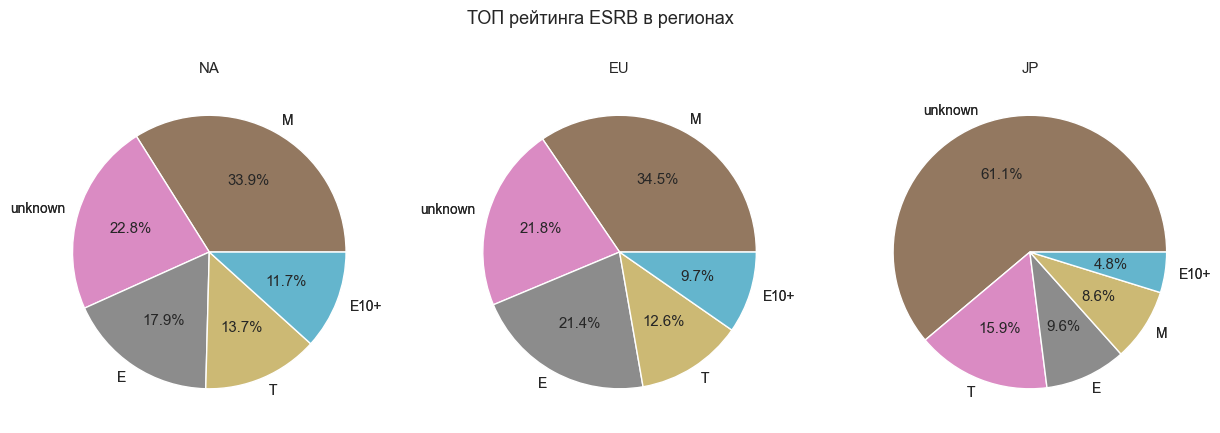

In [52]:
 # круговая диаграмма для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП рейтинга ESRB в регионах')
for i in range(3):
  # влияние рейтинга
  df_i = (actual_sales.groupby('rating')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  axs[i].pie(df_i[countries[i]], labels = df_i['rating'])
  axs[i].pie(df_i[countries[i]], labels = df_i['rating'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

<div style='border:solid blue 3px; padding: 20px'>

**Выводы п.5.3:**
- в Северной Америке и Европе похожее распределение рейтинга ESRB: наиболее популярные **M, E, T**
- в Японии рейтинга ESRB распределяется по следующим типам: **T, E, M**

<div style='border:solid blue 3px; padding: 20px'>

**Общие выводы п.5:**
- во всех регионах самая популярная платформа - **ps4**
- на втором месте по популярности во всех регионах **xone**
- популярность жанров в регионах отличается
1) в Северной Америке и Европе самые популярные жанры: шутеры, аркады и спортивные
2) в Японии вкусы отличаются: ролевые игры и аркады 
- в Северной Америке и Европе похожее распределение рейтинга ESRB: наиболее популярные **M, E, T**
- в Японии рейтинга ESRB распределяется по следующим типам: **T, E, M**

# Проверка гипотез

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем гипотезу

Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтерантивная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [53]:
 # удаление значений-заглушек
score = df[df['user_score'] != -10]
score = df[df['user_score'] != -1]

print('Средний пользовательский рейтинг платформ Xbox One', round(score.query('platform == "xone"')['user_score'].mean(),2))
print('Средний пользовательский рейтинг платформ PC', round(score.query('platform == "pc"')['user_score'].mean(),2))
print()

results = st.ttest_ind(
    score.query('platform == "xone"')['user_score'], 
    score.query('platform == "pc"')['user_score'], 
    equal_var=False)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


Средний пользовательский рейтинг платформ Xbox One 5.58
Средний пользовательский рейтинг платформ PC 6.04

p-значение: 0.16254368400243804
Не получилось отвергнуть нулевую гипотезу


<div style='border:solid blue 3px; padding: 20px'>

**Общий вывод п.6.1:**
- Средний пользовательский рейтинг платформ Xbox One 5.58
- Средний пользовательский рейтинг платформ PC 6.04
- p-значение: 0.16254368400243804
- не получилось отвергнуть нулевую гипотезу

## Средние пользовательские рейтинги жанров Action и Sports разные

Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтерантивная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports различаются.

In [54]:
print('Средний пользовательский рейтинг жанра экшен', round(score.query('genre == "action"')['user_score'].mean(),2))
print('Средний пользовательский рейтинг жанра спортивных игр', round(score.query('genre == "sports"')['user_score'].mean(),2))
print()

results = st.ttest_ind(
    score.query('genre == "action"')['user_score'], 
    score.query('genre == "sports"')['user_score'], 
    equal_var=False)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг жанра экшен 4.15
Средний пользовательский рейтинг жанра спортивных игр 2.35

p-значение: 1.2231384067780618e-13
Отвергаем нулевую гипотезу


<div style='border:solid blue 3px; padding: 20px'>

**Общий вывод п.6.2:**
- Средний пользовательский рейтинг жанра экшен 4.15
- Средний пользовательский рейтинг жанра спортивных игр 2.35
- p-значение: 1.2231384067780618e-13
- отвергаем нулевую гипотезу

<div style='border:solid green 5px; padding: 20px'>
    
В заключение посчитаем насколько уменьшился датафрейм

In [55]:
len_data_out = len(df)
len_data_out

16569

In [56]:
len_data_out = len(df)
df_decrease = round(((len_data_in - len_data_out) / len_data_in * 100), 2)
print('Датафрейм уменьшился на:', df_decrease, '%')

Датафрейм уменьшился на: 0.87 %


# Общий вывод

<div style='border:solid violet 5px; padding: 20px'>

**Краткий обзор проделанной работы**

**Изучены входные данные**
- приведена общая информация о датафрейме
- посчитано количество и доля пропусков в столбцах
- приведена визуализация пропущенных данных по строкам датафрейма
- построена общая гистограмма для всех числовых столбцов датафрейма

**Подготовка данных**
- выполнено переименование названий столбцов в нижнем регистре
- изменены типы данных в столбцах **year_of_release** и **critic_score** на целые числа (integer) не трогая пропуски
- посчитано количество уникальных значений в колонках **name, platform, genre**
- приведены значения в колонках **name, platform, genre** к нижнему регистру
- в столбце **year_of_release** суммарно 1,6% пропусков, их заполнили частично значением первого года выпуска игры с тем же названием, остальные строки удалили (менее 0,9%)
- в столбце **critic_score** пропуски заменили на -1
- в столбце **user_score** пропуски заменили на -1, а строки со значением **tbd** заменили на -10
- в столбце **rating** пропуски заменили на **'unknown'**
- дабавлен новый столбец - суммарные продажи во всех регионах **'sum_sale'**


**Исследовательский анализ**
- посчитано количество выпущенных игр по годам, построен график
- изменение продаж в игровых платформах
- предложен прогноз продаж на основе актуального периода
- построен график «ящик с усами» по глобальным продажам игр в разбивке по платформам
- оценено влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы
- посчитана и визуализирована корреляция между отзывами и продажами
- оценка распределения игр по жанрам


**Портрет пользователя каждого региона**
- ТОП-5 популярных платформ
- ТОП-5 популярных жанров
- влияние рейтинга ESRB на продажи в регионах

**Проверка гипотез**
- Первая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Вторая гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные


**Главные выводы**

В полученных данных было много пропусков, которые необходимо было подготовить для дальнейшей работы. Качественный и правильный сбор данных очень важен для анализа, т.к. потеря данных в определенных ячейках влияет на искажение других показателей ввиду того, что пустые ячейки либо удаляются, либо заменяются "заплатками".

Анализируя полученные данные можно сделать вывод, что наибольшее влияние на количество продаж оказывает тип платформы, а также региональные предпочтения покупателей к жанрам и платформам. Наиболее преспективная платформа, которая, вероятнее всего, будет ps4, ps5. Выявлены также определенные игровые жанры, которые инересны у большенства покупателей в разных регионах: аркады, шутеры, ролевые игры и спортивные.  
    

Датафрейм уменьшился на: 0.87 %, а это значит, что полученные результаты можно считать не искажены из-за обработки пропусков

**Рекомендации по использованию исследуемых зависимостей**

При опредлелении популярности игр стоит учитывать:

- жанр, с учетом предпочтений региона
- популярность платформ
- возрастного рейтинг покупателей
- оценки критиков организаций **ESRB**
- экономическую ситуацию в мире и в регионах продаж